In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,8)

In [2]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [3]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [4]:
import mpl_toolkits.basemap as bm

def plot_geo(lat, lon, labels=None):    
    lllat, lllon = lat.min()-1, lon.max()+1
    urlat, urlon = lat.max()+1, lon.min()-1

    plt.figure(figsize=(10, 10))

    m = bm.Basemap(
        llcrnrlon=lllon,
        llcrnrlat=lllat,
        urcrnrlon=urlon,
        urcrnrlat=urlat, 
        projection='merc',
        resolution='h'
    )

    m.drawcoastlines(linewidth=0.5)
    m.drawmapboundary(fill_color='#47A4C9', zorder=1)
    m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

    parallels = np.linspace(lllat, urlat, 10)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    # draw meridians
    meridians = np.linspace(urlon, lllon, 10)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

    m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
            zorder=3, lw=0, c=labels)
    
#     print('что-то пошло не так')
#     plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
#     plt.axis('equal')

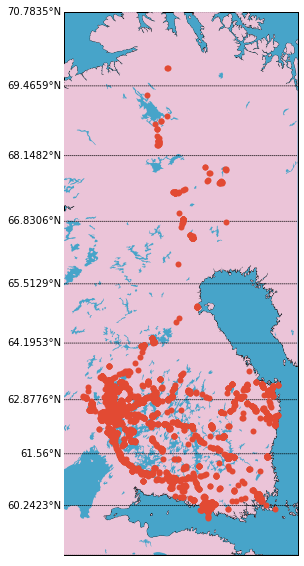

In [5]:
plot_geo(df_geo.lat.values, df_geo.lon.values)

In [6]:
km_in_radian = 6371.0088

In [7]:
from sklearn.neighbors import NearestNeighbors

In [8]:
X = df_geo.values
X = np.radians(X)

In [9]:
X[:10]

array([[1.09254644, 0.51912899],
       [1.09283093, 0.51913073],
       [1.09282744, 0.51915866],
       [1.09258309, 0.51905045],
       [1.09260753, 0.5191255 ],
       [1.09264243, 0.51926687],
       [1.09261451, 0.51913073],
       [1.09262324, 0.51918658],
       [1.09261276, 0.51913073],
       [1.09269828, 0.51920927]])

In [10]:
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')
model.fit(X)

NearestNeighbors(algorithm='ball_tree', metric='haversine', n_neighbors=20)

In [11]:
dist, y = model.kneighbors(return_distance=True)

In [12]:
dist.shape, y.shape

((13467, 20), (13467, 20))

In [13]:
dist[:20]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.03246121e-07, 8.03246121e-07,
        8.03246121e-07, 8.03246121e-07, 8.03246121e-07, 8.03246121e-07,
        8.03246121e-07, 8.03246121e-07, 8.03246121e-07, 8.03246121e-07,
        1.60649224e-06, 1.60649224e-06, 1.60649224e-06, 1.60649224e-06],
       [1.92111235e-06, 2.37152920e-06, 2.37152920e-06, 3.49065850e-06,
        3.65487077e-06, 3.84222132e-06, 4.01402636e-06, 4.01402636e-06,
        4.01402636e-06, 4.37704552e-06, 4.74305473e-06, 5.12327659e-06,
        5.23598776e-06, 5.29717449e-06, 5.29717449e-06, 5.29717449e-06,
        5.47663464e-06, 5.61963690e-06, 5.76333028e-06, 5.88441898e-06],
       [3.58178691e-06, 3.65489928e-06, 4.01405341e-06, 5.88447322e-06,
        7.02732406e-06, 8.02810681e-06, 8.28634239e-06, 8.48178366e-06,
        8.92305999e-06, 9.00175209e-06, 9.49575037e-06, 1.03795264e-05,
        1.05814531e-05, 1.09532709e-05, 1.13295357e-05, 1.1374

In [14]:
y[:20]

array([[13068,   641, 11603, 11953, 12790, 13270,  4136,  8902, 11196,
        12492,  4695, 10765, 12367,  2386,  2319, 12881,  1901, 12612,
        11459, 13201],
       [ 1158,   627,  1152,  1157,  5603,  1190, 13444,  5479,  5604,
         1148,   996,  5478,  1291,    61, 13368, 13417,  1092,  4723,
          132, 11046],
       [ 1147,  1534,   943,  1548,  1192,   946,  1056,   510,   947,
         1189, 12536, 12532, 12538,  1257,   127,   942,   913,  1152,
        12531,  1191],
       [ 6534,  8911,  5321,  5805,  7317,  5322,  1797,  2092,   171,
         6291, 13072, 11357,  2097,  4703,  8135, 13187, 11049,   276,
          277,  2104],
       [ 1431,    11, 13102,  1813,  1863,  6530,  9078, 12787,  1414,
           18,  1408,  1383,  7318,  1288,    14,  1401, 12676,  8883,
        13154, 12816],
       [12539, 12498, 12499,  5670,  5671, 12254, 11189,  5337, 11955,
        13160,  1532, 11508, 11734, 11727,   514,  9750,  1267,  1533,
         4662,   573],
       [ 6

In [15]:
dist = dist[:, -1]

In [16]:
dist = np.sort(dist)

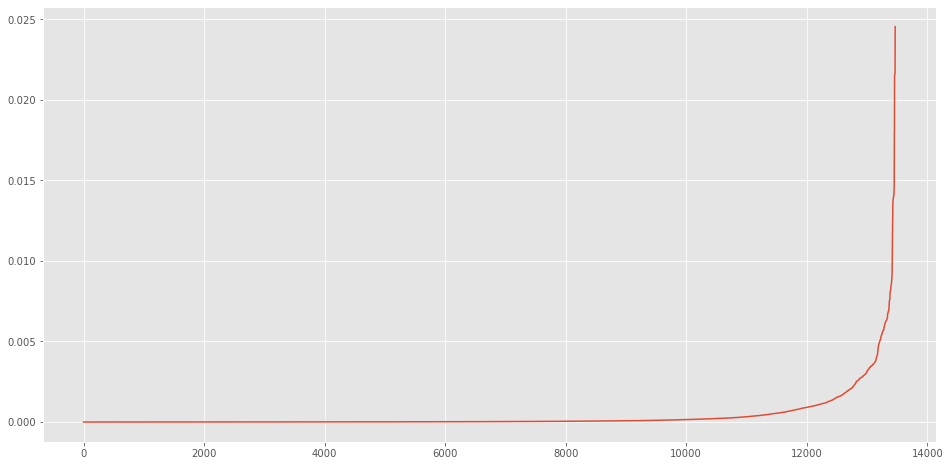

In [17]:
plt.plot(dist)

In [18]:
eps = 0.002

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.002, metric='haversine', min_samples=20)

In [21]:
labels = dbscan.labels_

In [22]:
pd.Series(labels).value_counts()

 0     10666
-1       536
 3       329
 10      290
 1       249
 2       162
 5       146
 9       137
 13       93
 16       68
 18       67
 7        59
 22       50
 27       48
 11       44
 6        43
 26       39
 21       37
 17       36
 12       34
 8        33
 14       33
 23       31
 30       28
 25       27
 19       26
 24       25
 29       24
 15       24
 31       22
 4        21
 20       20
 28       20
dtype: int64

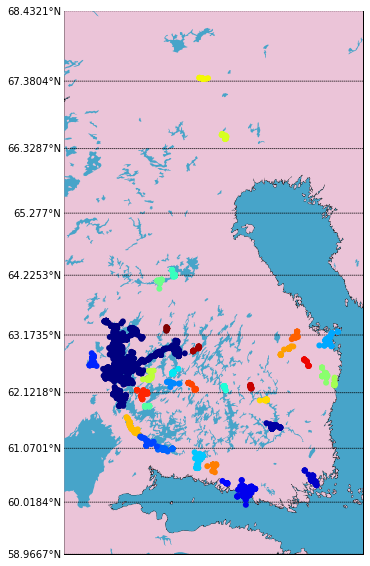

In [23]:
idx = labels!=-1
plot_geo(df_geo.loc[idx, 'lat'].values, 
         df_geo.loc[idx, 'lon'].values, 
         labels=labels[idx])